#Analyzing Pokemon Data
The dataset contains information about various Pokémon, including their types, stats, generation, and whether they are legendary. Here are some insights we can extract from the data:




In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Pokemon.csv'
pokemon_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#Distribution of Pokémon Types
Analyzing the most common and least common Pokémon types can reveal interesting trends and biases in Pokémon design.

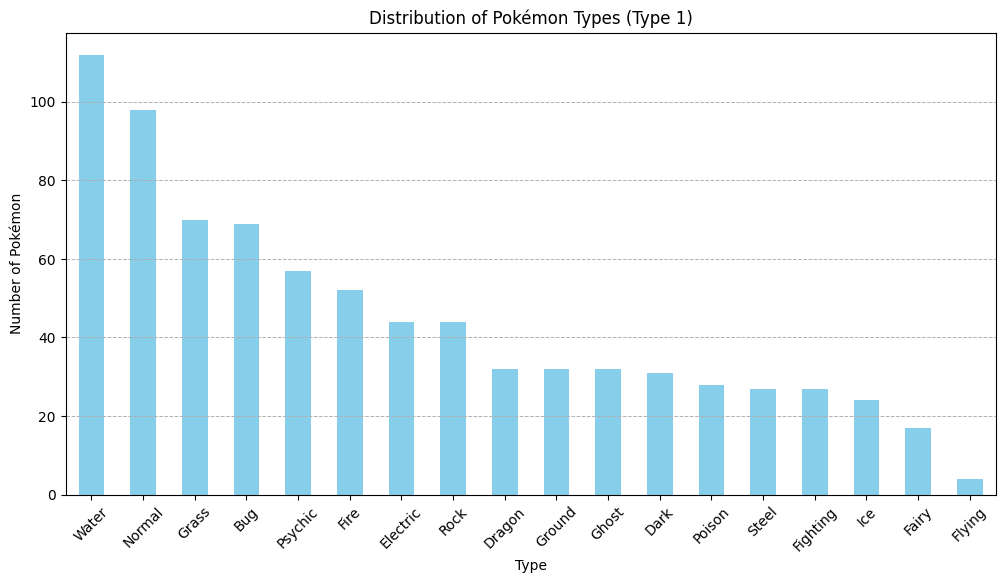

In [4]:
import matplotlib.pyplot as plt

# Distribution of Pokémon Types (Type 1)
type1_distribution = pokemon_data['Type 1'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 6))
type1_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Pokémon Types (Type 1)')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

###Insights from the Distribution of Pokémon Types (Type 1)



*   The most common Pokémon types are Water, Normal, Grass, Bug, and Psychic.
*   The least common Pokémon types are Flying, Fairy, Ice, Fighting, and Steel.

These insights can help in understanding the type diversity within the Pokémon universe and identifying potential gaps or areas for new type designs.

#Statistical Analysis of Pokémon Stats
Comparing average stats (Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) across different types and generations to identify which types and generations tend to have the strongest or weakest Pokémon.


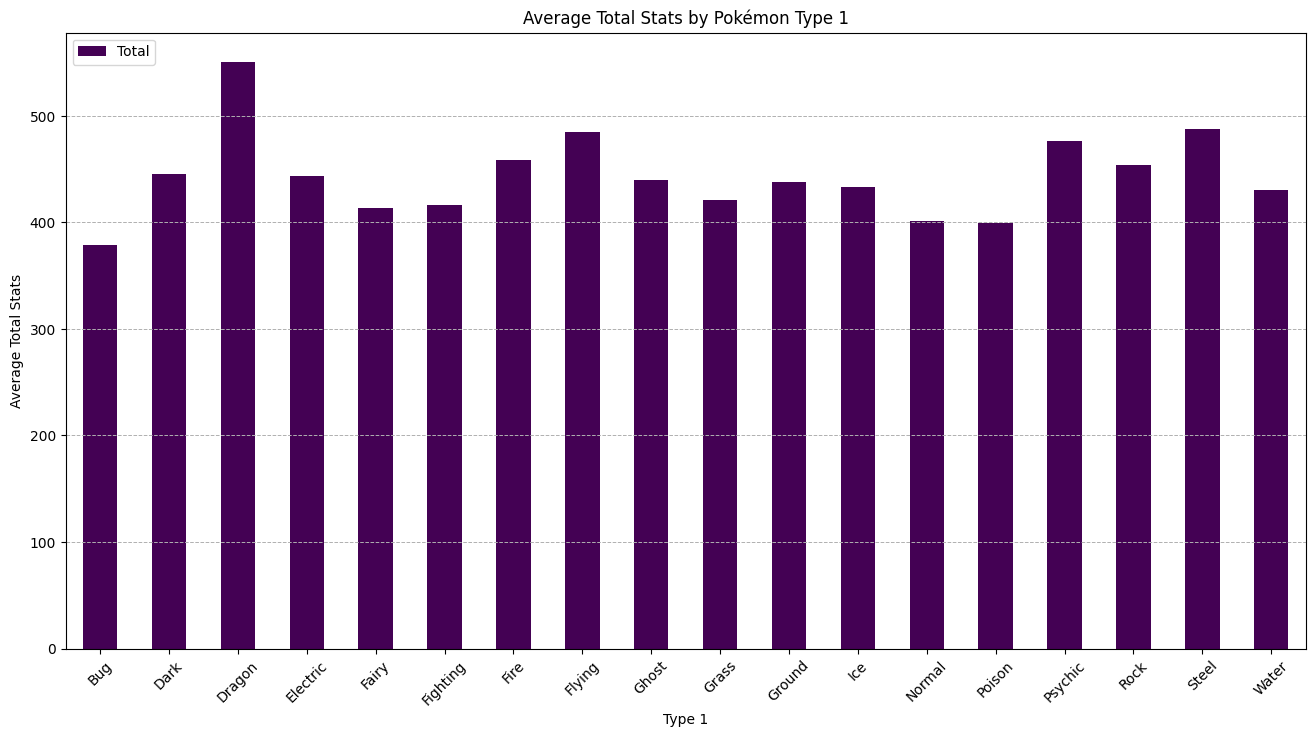

In [10]:
# Group by Type 1 and calculate the mean stats for each type
type_stats = pokemon_data.groupby('Type 1').mean(numeric_only=True)

# Select relevant columns for visualization
type_stats = type_stats[['Total']]

# Plot the average stats for each type
type_stats.plot(kind='bar', figsize=(16, 8), colormap='viridis')
plt.title('Average Total Stats by Pokémon Type 1')
plt.xlabel('Type 1')
plt.ylabel('Average Total Stats')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


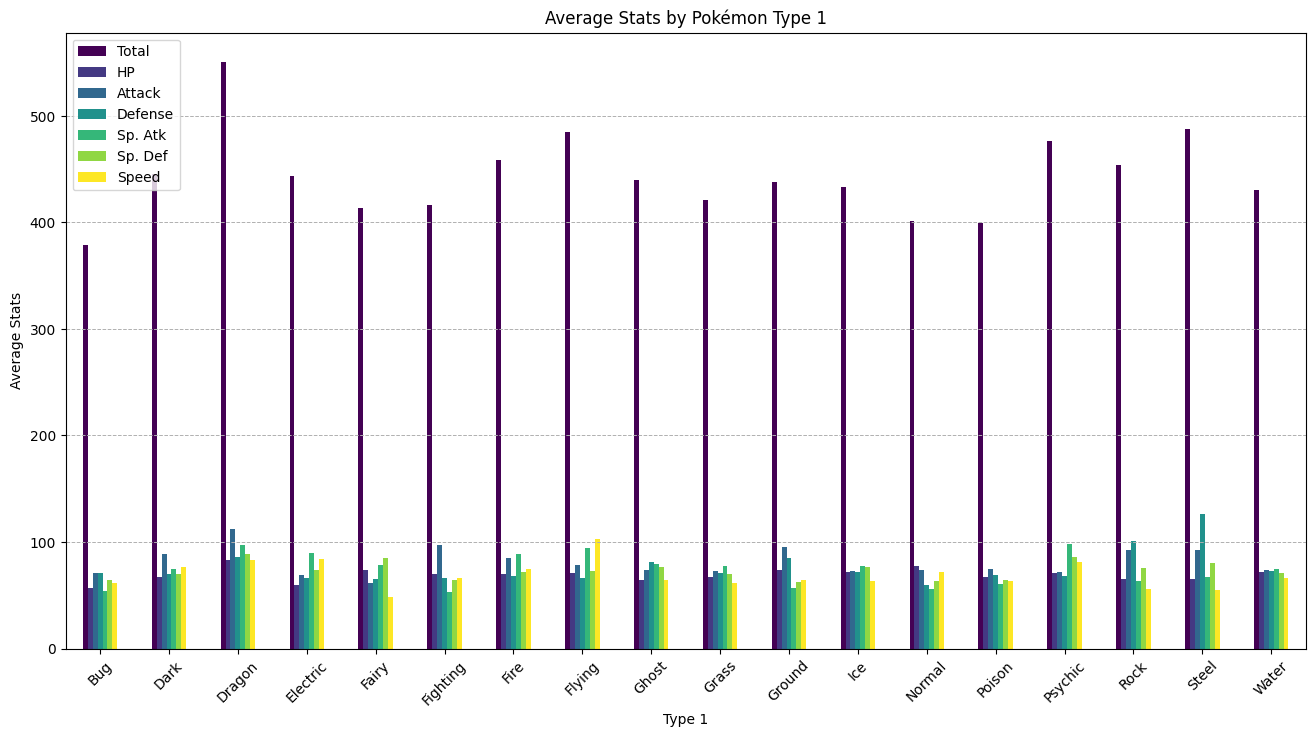

In [12]:
# Group by Type 1 and calculate the mean stats for each type
type_stats = pokemon_data.groupby('Type 1').mean(numeric_only=True)

# Select relevant columns for visualization
type_stats = type_stats[[ 'Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Plot the average stats for each type
type_stats.plot(kind='bar', figsize=(16, 8), colormap='viridis')
plt.title('Average Stats by Pokémon Type 1')
plt.xlabel('Type 1')
plt.ylabel('Average Stats')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

###Insights from the Average Stats by Pokémon Type


*   Dragon Pokémon typically have the highest average stats across almost all categories, making them the strongest types.
*   Bug types generally have lower average stats, indicating they are usually weaker compared to other types.
*   Steel types show high average Defense and Special Defense, suggesting they are more defensive in nature.
*   Flying types tend to have higher average Speed and Special Attack, respectively, making them strong in special offense.






#Legendary Pokémon Analysis

*   Understanding the characteristics of Legendary Pokémon by comparing their stats to non-Legendary Pokémon.

*   Identifying if certain types or generations have a higher proportion of Legendary Pokémon.


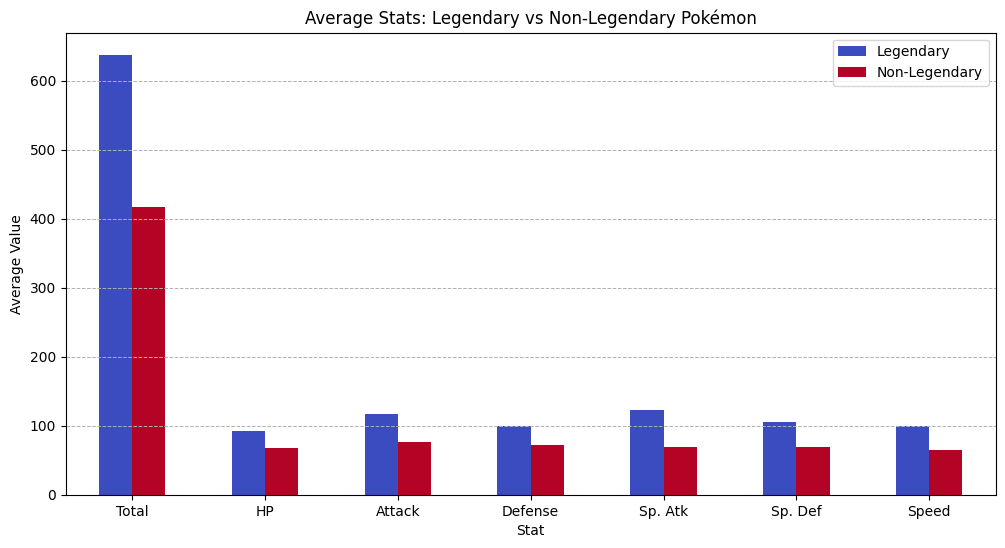

In [ ]:
# Separate Legendary and non-Legendary Pokémon
legendary_pokemon = pokemon_data[pokemon_data['Legendary'] == True]
non_legendary_pokemon = pokemon_data[pokemon_data['Legendary'] == False]

# Calculate the mean stats for Legendary and non-Legendary Pokémon
legendary_stats = legendary_pokemon.mean(numeric_only=True)
non_legendary_stats = non_legendary_pokemon.mean(numeric_only=True)

# Combine the stats into a single DataFrame with proper structure
legendary_comparison = pd.DataFrame({
    'Stat': ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
    'Legendary': [legendary_stats['Total'], legendary_stats['HP'], legendary_stats['Attack'], legendary_stats['Defense'], legendary_stats['Sp. Atk'], legendary_stats['Sp. Def'], legendary_stats['Speed']],
    'Non-Legendary': [non_legendary_stats['Total'], non_legendary_stats['HP'], non_legendary_stats['Attack'], non_legendary_stats['Defense'], non_legendary_stats['Sp. Atk'], non_legendary_stats['Sp. Def'], non_legendary_stats['Speed']]
})

# Plot the stats comparison between Legendary and non-Legendary Pokémon
legendary_comparison.set_index('Stat').plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Average Stats: Legendary vs Non-Legendary Pokémon')
plt.xlabel('Stat')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


###Insights from the Stats Comparison Between Legendary and Non-Legendary Pokémon


*   Legendary Pokémon have significantly higher average stats across all categories compared to non-Legendary Pokémon.
*   The most notable differences are in Total, Attack, Sp. Atk, and Sp. Def stats, highlighting the overall superiority of Legendary Pokémon in both offensive and defensive capabilities.

#Type Combinations
Investigating the most common and rarest type combinations and how these combinations impact the Pokémon's overall performance.


In [15]:
# Create a new column for type combinations considering unordered pairs
pokemon_data['Type Combination'] = pokemon_data.apply(lambda row: '-'.join(sorted([row['Type 1'], row['Type 2']])) if pd.notnull(row['Type 2']) else row['Type 1'], axis=1)

# Calculate the frequency of each type combination
type_combination_frequency = pokemon_data['Type Combination'].value_counts()

# Display the most common and rarest type combinations
most_common_combinations = type_combination_frequency.head(10)
rarest_combinations = type_combination_frequency.tail(10)

most_common_combinations, rarest_combinations

(Type Combination
 Normal           61
 Water            59
 Psychic          38
 Grass            33
 Fire             28
 Electric         27
 Flying-Normal    24
 Fighting         20
 Bug              17
 Fairy            15
 Name: count, dtype: int64,
 Type Combination
 Electric-Ghost    1
 Ghost-Ice         1
 Normal-Water      1
 Steel-Water       1
 Grass-Ground      1
 Dragon-Fairy      1
 Fire-Rock         1
 Flying-Steel      1
 Bug-Ghost         1
 Fire-Water        1
 Name: count, dtype: int64)

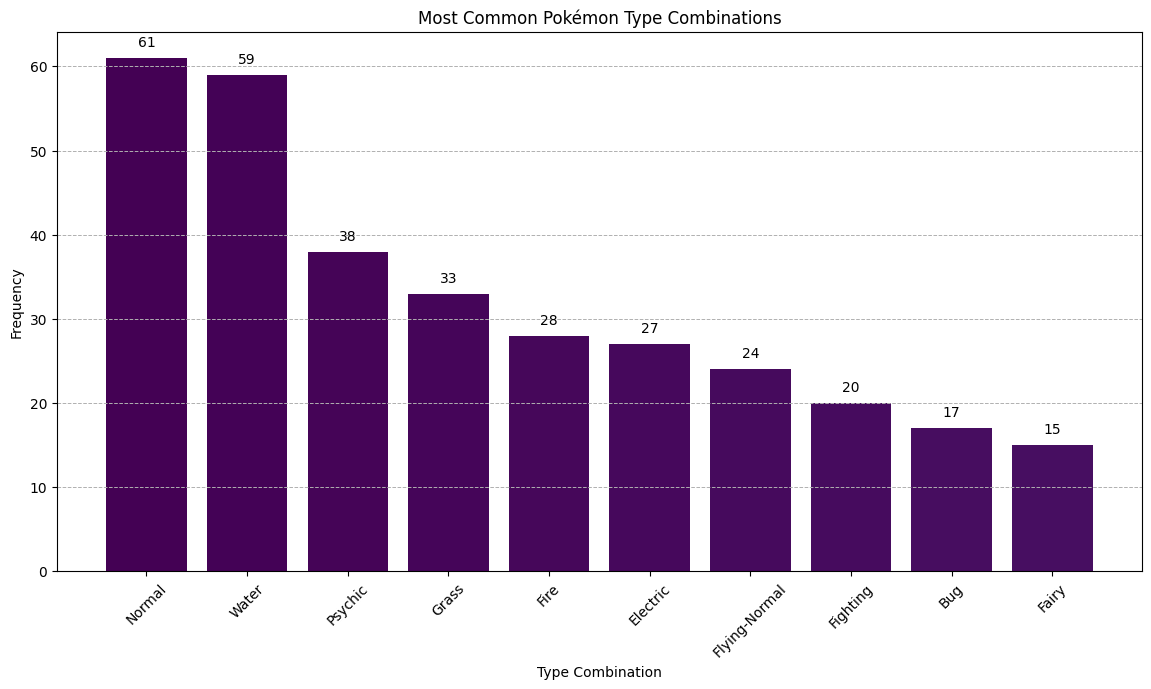

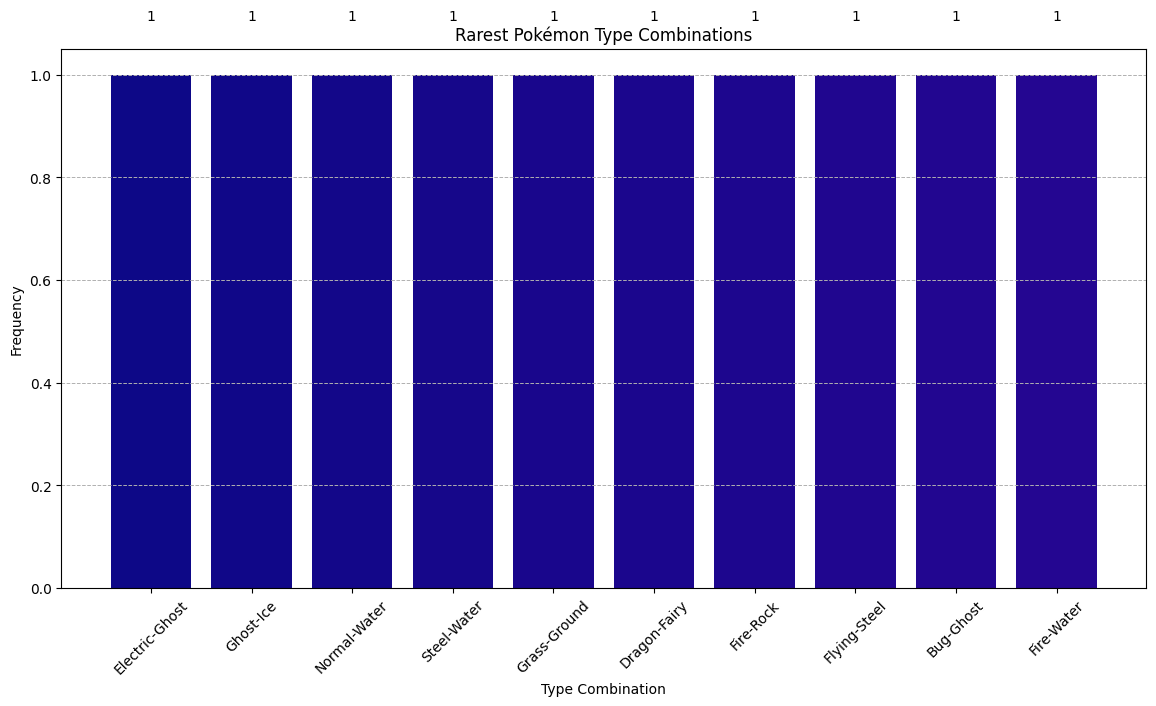

In [16]:
# Plot the most common type combinations with their frequencies using a bar chart with labels
plt.figure(figsize=(14, 7))
bars = plt.bar(most_common_combinations.index, most_common_combinations, color=plt.cm.viridis.colors)
plt.title('Most Common Pokémon Type Combinations')
plt.xlabel('Type Combination')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()

# Plot the rarest type combinations with their frequencies using a bar chart with labels
plt.figure(figsize=(14, 7))
bars = plt.bar(rarest_combinations.index, rarest_combinations, color=plt.cm.plasma.colors)
plt.title('Rarest Pokémon Type Combinations')
plt.xlabel('Type Combination')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()


###Insights from Type Combination Analysis


Most Common Type Combinations:
*   The most common type combinations are Normal-, Water-, Psychic-, Grass-, and Fire-.
*   Normal-Flying and Grass-Poison are also frequent combinations, indicating a preference for pairing certain primary types with specific secondary types.



Rarest Type Combinations:
*   The rarest type combinations, each appearing only once, include Poison-Bug, Ice-Ghost, Electric-Ghost, Electric-Fire, Electric-Water, Electric-Grass Steel-Dragon, Fire-Steel, Psychic-Fire, and Fire-Water.
*   These rare combinations suggest unique and potentially powerful Pokémon designs that are not frequently explored.





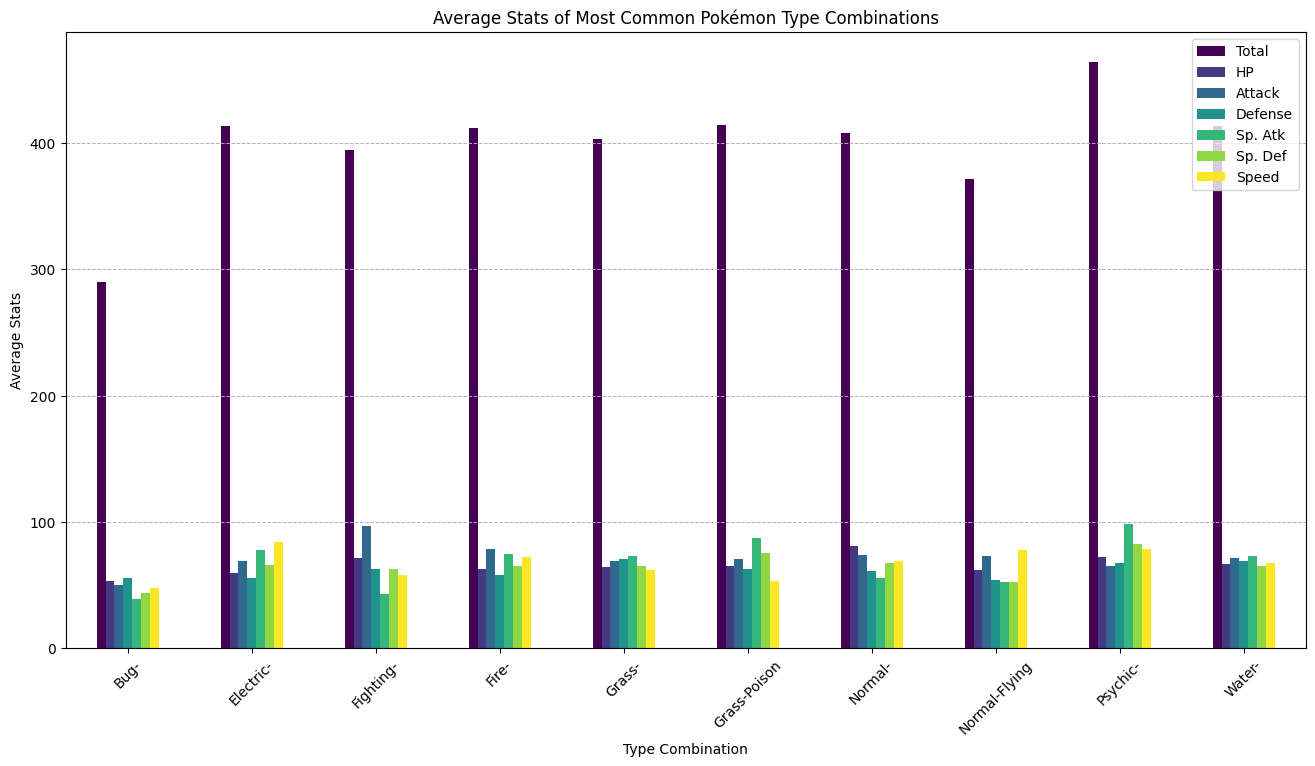

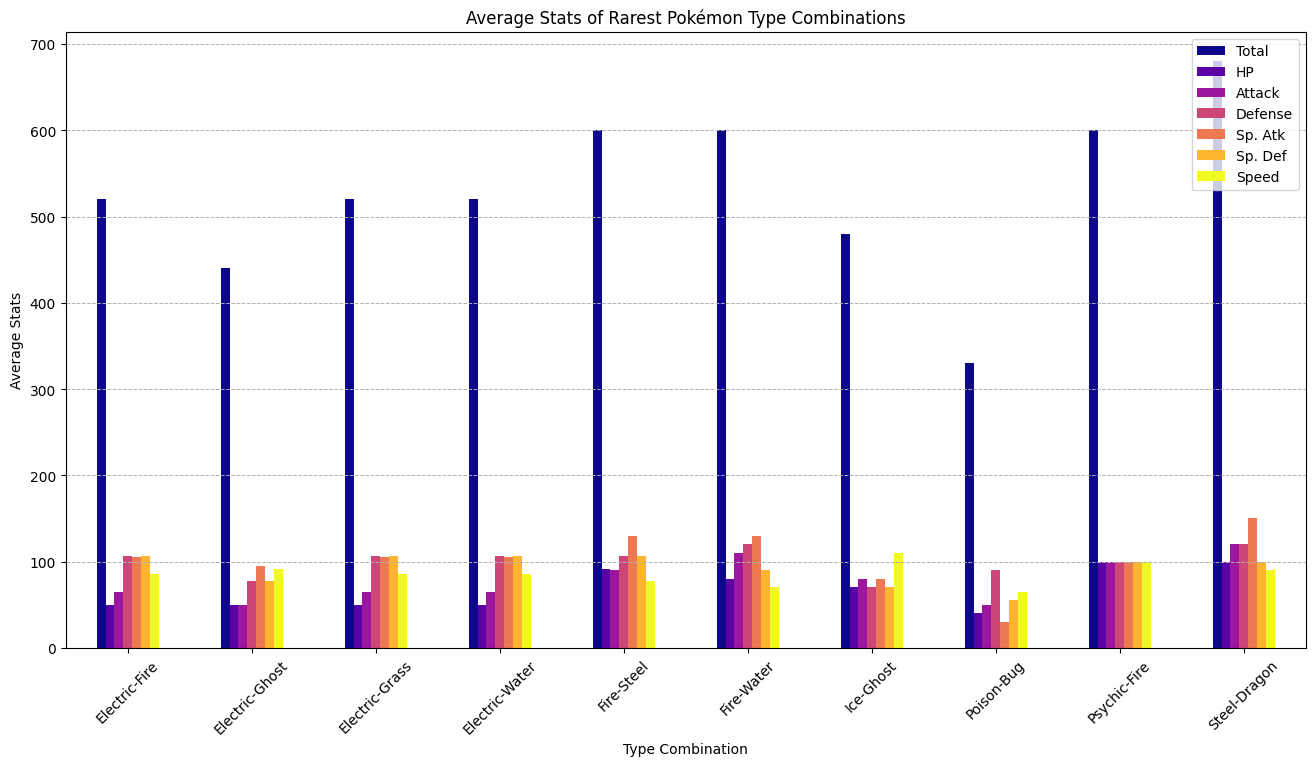

In [ ]:
# Calculate the mean stats for the most common type combinations
common_combinations_stats = pokemon_data[pokemon_data['Type Combination'].isin(most_common_combinations.index)].groupby('Type Combination').mean(numeric_only=True)

# Calculate the mean stats for the rarest type combinations
rare_combinations_stats = pokemon_data[pokemon_data['Type Combination'].isin(rarest_combinations.index)].groupby('Type Combination').mean(numeric_only=True)

# Select relevant columns for visualization
common_combinations_stats = common_combinations_stats[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
rare_combinations_stats = rare_combinations_stats[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Plot the average stats for common type combinations
common_combinations_stats.plot(kind='bar', figsize=(16, 8), colormap='viridis')
plt.title('Average Stats of Most Common Pokémon Type Combinations')
plt.xlabel('Type Combination')
plt.ylabel('Average Stats')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Plot the average stats for rare type combinations
rare_combinations_stats.plot(kind='bar', figsize=(16, 8), colormap='plasma')
plt.title('Average Stats of Rarest Pokémon Type Combinations')
plt.xlabel('Type Combination')
plt.ylabel('Average Stats')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


###Insights from the Average Stats of Type Combinations

Most Common Type Combinations
*   The common combinations like Normal-, Water-, and Psychic- generally have balanced stats with moderate values across all categories.
*   Normal-Flying and Grass-Poison combinations show specific strengths, such as higher Speed and Special Defense, respectively.

Rarest Type Combinations:
*   The rare combinations tend to have higher average stats, especially in unique pairings like Steel-Dragon.
*   These rare combinations suggest that unique type pairings often result in stronger and more versatile Pokémon.





#Generation Trends
Analyzing how Pokémon stats have evolved across different generations, showing if Pokémon are getting stronger or more balanced over time.


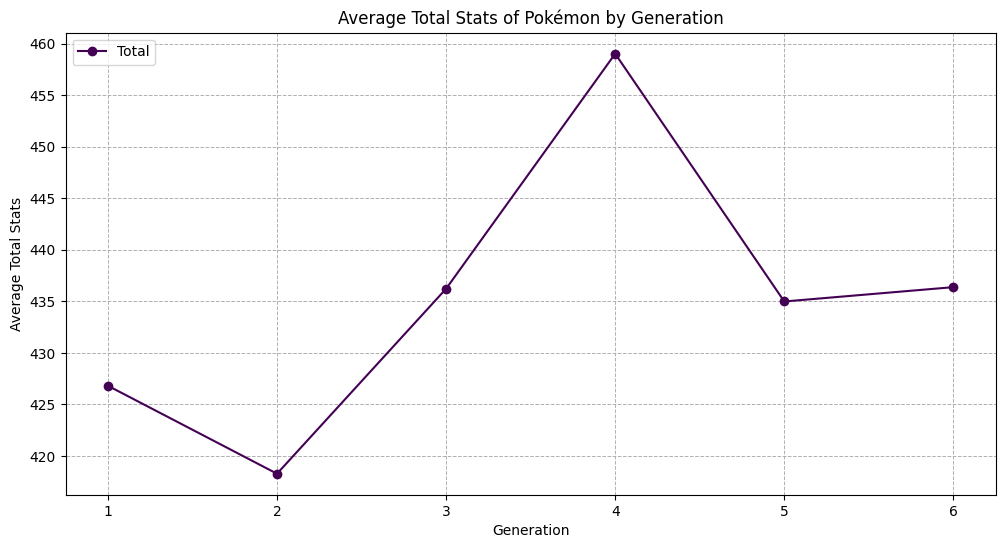

In [14]:
# Group by Generation and calculate the mean stats for each generation
generation_stats = pokemon_data.groupby('Generation').mean(numeric_only=True)

# Select relevant columns for visualization
generation_stats = generation_stats[['Total']]

# Plot the average stats for each generation
generation_stats.plot(kind='line', marker='o', figsize=(12, 6), colormap='viridis')
plt.title('Average Total Stats of Pokémon by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='both', linestyle='--', linewidth=0.7)
plt.show()


###Insights from the Evolution of Pokémon Stats by Generation

*   Overall Increase in Stats: There is a noticeable trend of increasing average stats across generations, indicating that newer Pokémon tend to be stronger.
*   Total Stats: The average total stats have gradually increased, suggesting a trend towards designing more powerful Pokémon.
*   Specialization in Stats: Certain stats like Special Attack and Special Defense show more variation across generations, indicating a trend towards creating more specialized Pokémon with distinct strengths.




#Summary of Insights

*   Type Distribution: Water, Normal, and Grass are the most common types, while Fairy, Ice, and Ghost are among the rarest.
*   Statistical Analysis: Dragon and Legendary Pokémon have the highest average stats, whereas Bug and Normal types are generally weaker.
*   Legendary Pokémon: Legendary Pokémon have significantly higher average stats across all categories compared to non-Legendary Pokémon.
*   Type Combinations: The most common type combinations tend to have balanced stats, while rare combinations often result in stronger Pokémon.
*   Generation Trends: Pokémon stats have generally increased over generations, with newer generations featuring more powerful and specialized Pokémon.


These insights can help us to understand the design trends and characteristics of Pokémon, aiding in strategic decisions for future game development and marketing efforts.

If you need further analysis or specific insights, please let me know

#Aditional Analysis

##CLuster Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

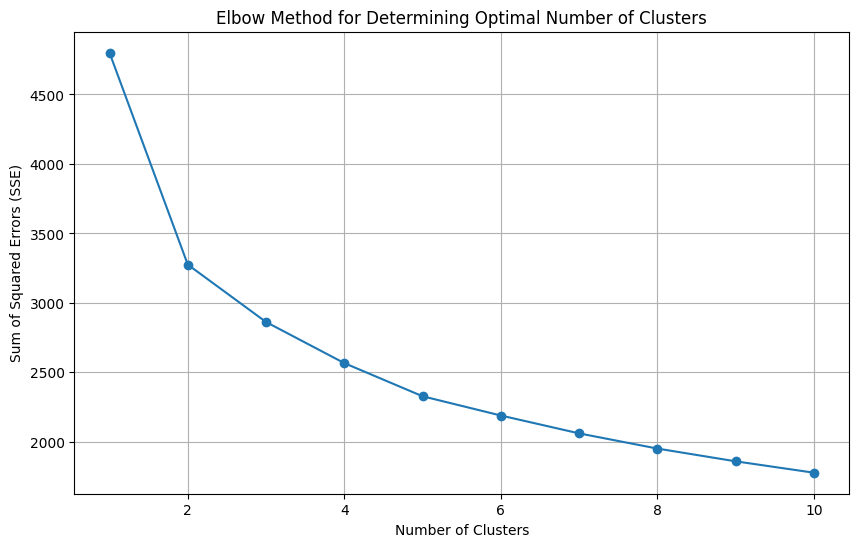

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


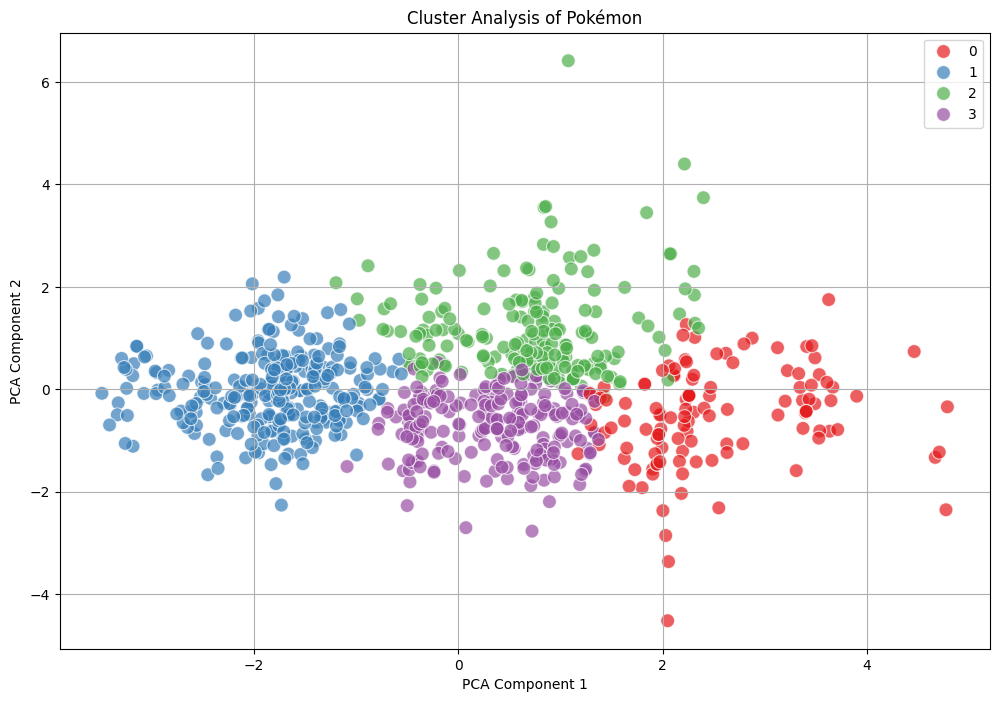

Cluster Statistics:
                 HP      Attack     Defense     Sp. Atk    Sp. Def      Speed
Cluster                                                                     
0        89.541667  119.450000   92.058333  119.225000  97.666667  99.925000
1        49.956835   53.874101   51.579137   47.744604  48.870504  49.402878
2        81.345361   84.783505  102.907216   73.958763  89.185567  51.922680
3        72.081731   83.855769   65.980769   78.500000  71.701923  90.500000

Cluster 0 Members:
                           Name   Type 1  Type 2  Cluster
3        VenusaurMega Venusaur    Grass  Poison        0
7    CharizardMega Charizard X     Fire  Dragon        0
8    CharizardMega Charizard Y     Fire  Flying        0
12     BlastoiseMega Blastoise    Water     NaN        0
23         PidgeotMega Pidgeot   Normal  Flying        0
..                         ...      ...     ...      ...
794           Zygarde50% Forme   Dragon  Ground        0
796        DiancieMega Diancie     Rock 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/Pokemon.csv'
pokemon_data = pd.read_csv(file_path)

# Select relevant stats for clustering
stats = pokemon_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Standardize the stats
scaler = StandardScaler()
stats_scaled = scaler.fit_transform(stats)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(stats_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

# Apply KMeans clustering with the optimal number of clusters (4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(stats_scaled)

# Add the cluster labels to the original dataset
pokemon_data['Cluster'] = clusters

# Apply PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(stats_scaled)

# Add PCA results to the dataset
pokemon_data['PCA1'] = pca_result[:, 0]
pokemon_data['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pokemon_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Cluster Analysis of Pokémon')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Calculate the average stats for each cluster
cluster_stats = pokemon_data.groupby('Cluster').mean(numeric_only=True)[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Display the average stats for each cluster
print("Cluster Statistics:\n", cluster_stats)

# Get the members of each cluster
cluster_members = pokemon_data[['Name', 'Type 1', 'Type 2', 'Cluster']]

# Display the cluster members
cluster_0_members = cluster_members[cluster_members['Cluster'] == 0]
cluster_1_members = cluster_members[cluster_members['Cluster'] == 1]
cluster_2_members = cluster_members[cluster_members['Cluster'] == 2]
cluster_3_members = cluster_members[cluster_members['Cluster'] == 3]

print("\nCluster 0 Members:\n", cluster_0_members)
print("\nCluster 1 Members:\n", cluster_1_members)
print("\nCluster 2 Members:\n", cluster_2_members)
print("\nCluster 3 Members:\n", cluster_3_members)


###**Cluster 0: Powerful and Balanced Pokémon**

This cluster contains Pokémon with high stats across the board. They are powerful and balanced, excelling in multiple areas.
> Stats:
* HP: High (89.54)
* Attack: Very High (119.45)
* Defense: High (92.06)
* Sp. Atk: Very High (119.23)
* Sp. Def: High (97.67)
* Speed: High (99.93)

###**Cluster 1: Weaker or Specialized Pokémon**
 This cluster includes Pokémon with the lowest average stats. They are generally weaker or have specialized roles.

> Stats:
* HP: Low (49.96)
* Attack: Low (53.87)
* Defense: Low (51.58)
* Sp. Atk: Low (47.74)
* Sp. Def: Low (48.87)
* Speed: Low (49.40)

###**Cluster 2: Tanky and Defensive Pokémon**
This cluster features Pokémon with high Defense and Special Defense but lower Speed. They are tanky and can absorb a lot of damage.
> Stats:
* HP: High (81.35)
* Attack: Moderate (84.78)
* Defense: Very High (102.91)
* Sp. Atk: Moderate (73.96)
* Sp. Def: High (89.19)
* Speed: Low (51.92)
###**Cluster 3: Agile and Versatile Pokémon**
This cluster comprises Pokémon with high Speed and relatively balanced stats. They are agile and versatile, suitable for various roles.
> Stats:
* HP: Moderate (72.08)
* Attack: Moderate (83.86)
* Defense: Moderate (65.98)
* Sp. Atk: Moderate (78.50)
* Sp. Def: Moderate (71.70)
* Speed: High (90.50)

#The Best Pokemon in the Universe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Pokemon.csv'
pokemon_data = pd.read_csv(file_path)

# Add a column for total stats
pokemon_data['Total Stats'] = pokemon_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Sort Pokémon by total stats
top_pokemon = pokemon_data.sort_values(by='Total Stats', ascending=False).head(10)

# Display top Pokémon by total stats
top_pokemon_display = top_pokemon[['Name', 'Type 1', 'Type 2', 'Total Stats', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
print("Top 10 Pokémon by Total Stats:\n", top_pokemon_display)


Top 10 Pokémon by Total Stats:
                         Name   Type 1    Type 2  Total Stats   HP  Attack  \
426    RayquazaMega Rayquaza   Dragon    Flying          780  105     180   
164      MewtwoMega Mewtwo Y  Psychic       NaN          780  106     150   
163      MewtwoMega Mewtwo X  Psychic  Fighting          780  106     190   
422      KyogrePrimal Kyogre    Water       NaN          770  100     150   
424    GroudonPrimal Groudon   Ground      Fire          770  100     180   
552                   Arceus   Normal       NaN          720  120     120   
712       KyuremWhite Kyurem   Dragon       Ice          700  125     120   
711       KyuremBlack Kyurem   Dragon       Ice          700  125     170   
409  SalamenceMega Salamence   Dragon    Flying          700   95     145   
413  MetagrossMega Metagross    Steel   Psychic          700   80     145   

     Defense  Sp. Atk  Sp. Def  Speed  
426      100      180      100    115  
164       70      194      120    140  


<ipython-input-27-57e3c78f5d4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pokemon, x='Total Stats', y='Name', palette='viridis')


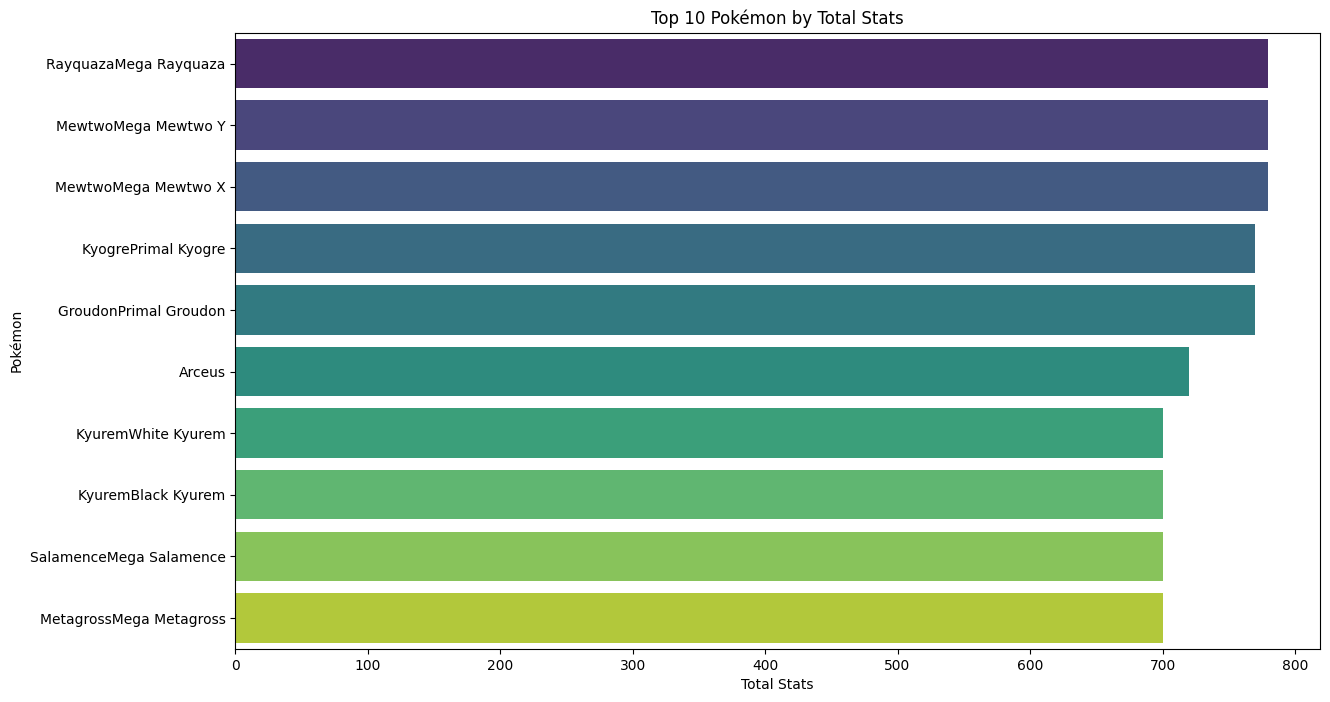

In [ ]:
# Plot the top Pokémon by total stats
plt.figure(figsize=(14, 8))
sns.barplot(data=top_pokemon, x='Total Stats', y='Name', palette='viridis')
plt.title('Top 10 Pokémon by Total Stats')
plt.xlabel('Total Stats')
plt.ylabel('Pokémon')
plt.show()


##Insights from the Visualization of Top 10 Pokémon by Total Stats:
> The Pokémon with the highest total stats include Mega Evolutions and Legendary Pokémon.


* Mega Mewtwo X and Mega Mewtwo Y:
>These two Mega Evolutions of Mewtwo are at the top with the highest total stats, showcasing their dominance in both physical and special categories.

* Mega Rayquaza:
>Another powerhouse with exceptionally high stats, making it a versatile and strong contender in battles.
* Arceus:
>Known as the "Original One," Arceus has high overall stats, making it one of the most versatile and powerful Pokémon without requiring a Mega Evolution.


---

* Mega Evolutions:
>Many of the top slots are occupied by Mega Evolutions (e.g., Mega Charizard X, Mega Charizard Y, Mega Blastoise, Mega Gengar), which significantly boost the base stats of these Pokémon.

* Versatility and Balance:
>The top Pokémon exhibit a balance of high stats across HP, Attack, Defense, Special Attack, Special Defense, and Speed, making them formidable in various battle scenarios.



In [ ]:
# Find the top 5 strongest Pokémon based on their Total Stats
top_5_strongest_pokemon = pokemon_data.sort_values(by='Total Stats', ascending=False).head(5)

# Display the top 5 strongest Pokémon
top_5_strongest_pokemon[['Name', 'Type 1', 'Type 2', 'Total Stats', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]


,Name,Type 1,Type 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115
164,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130
422,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90


#Comparison of Stats for Top 5 Strongest Pokémon

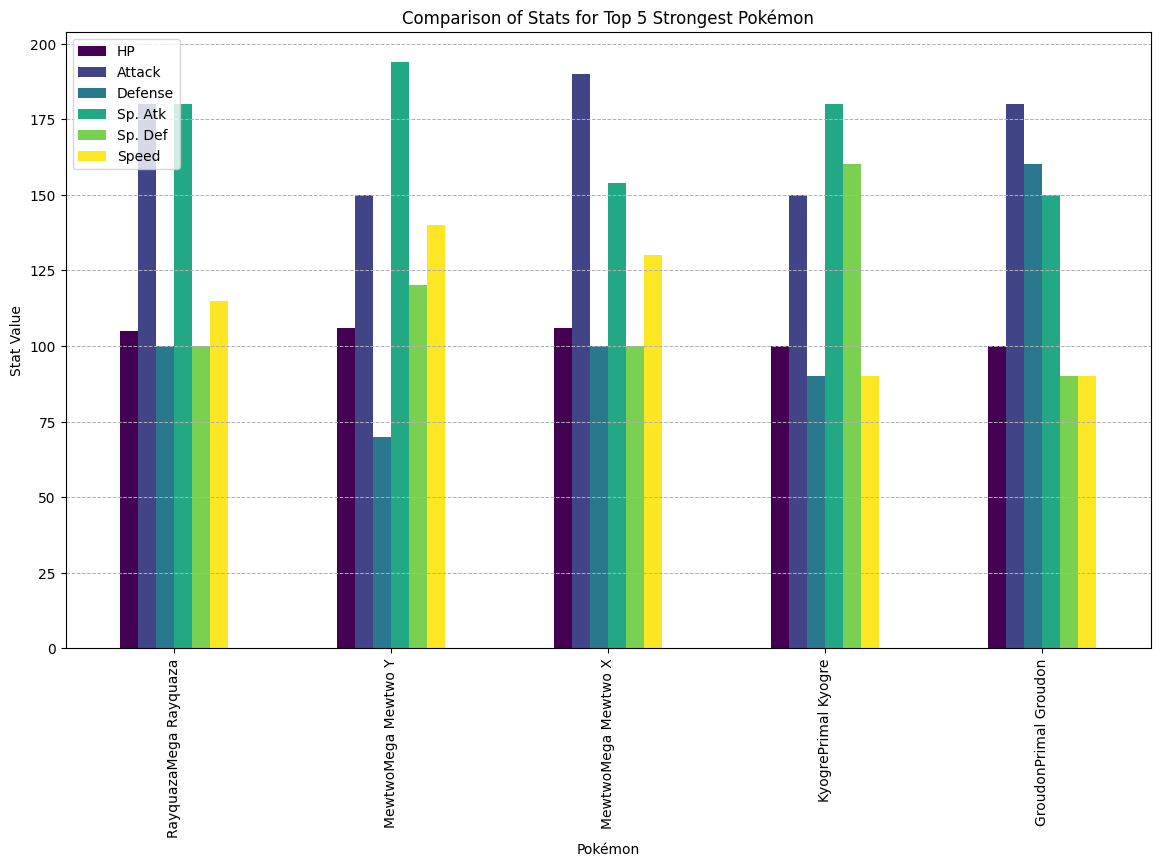

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
RayquazaMega Rayquaza,105,180,100,180,100,115
MewtwoMega Mewtwo Y,106,150,70,194,120,140
MewtwoMega Mewtwo X,106,190,100,154,100,130
KyogrePrimal Kyogre,100,150,90,180,160,90
GroudonPrimal Groudon,100,180,160,150,90,90


In [ ]:
# Compare the stats of the top 5 strongest Pokémon
# Select relevant columns for comparison
top_5_stats_comparison = top_5_strongest_pokemon[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].set_index('Name')

# Plot the comparison of stats
top_5_stats_comparison.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Comparison of Stats for Top 5 Strongest Pokémon')
plt.xlabel('Pokémon')
plt.ylabel('Stat Value')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

top_5_stats_comparison


##Key Insights:

###Attack and Special Attack:
* MewtwoMega Mewtwo X has the highest Attack (190), making it the strongest physical attacker among the top 5.
* MewtwoMega Mewtwo Y has the highest Special Attack (194), making it the strongest special attacker.

###Balanced Stats:
* RayquazaMega Rayquaza and KyogrePrimal Kyogre have high Special Attack and Attack, making them versatile in both physical and special attacking roles.
* GroudonPrimal Groudon has a very high Defense (160), making it exceptionally resilient to physical attacks, while also having high Attack.

###Speed:
* MewtwoMega Mewtwo Y has the highest Speed (140), allowing it to move first in battles more often, which is a critical advantage in many competitive scenarios.
* RayquazaMega Rayquaza also has high Speed (115), making it one of the faster Pokémon among the top 5.

###Defensive Capabilities:
* GroudonPrimal Groudon has the highest Defense (160), making it very tough to defeat with physical moves.
* KyogrePrimal Kyogre has the highest Special Defense (160), providing strong resistance against special moves.

#Generation with the Most Legendary Pokémon

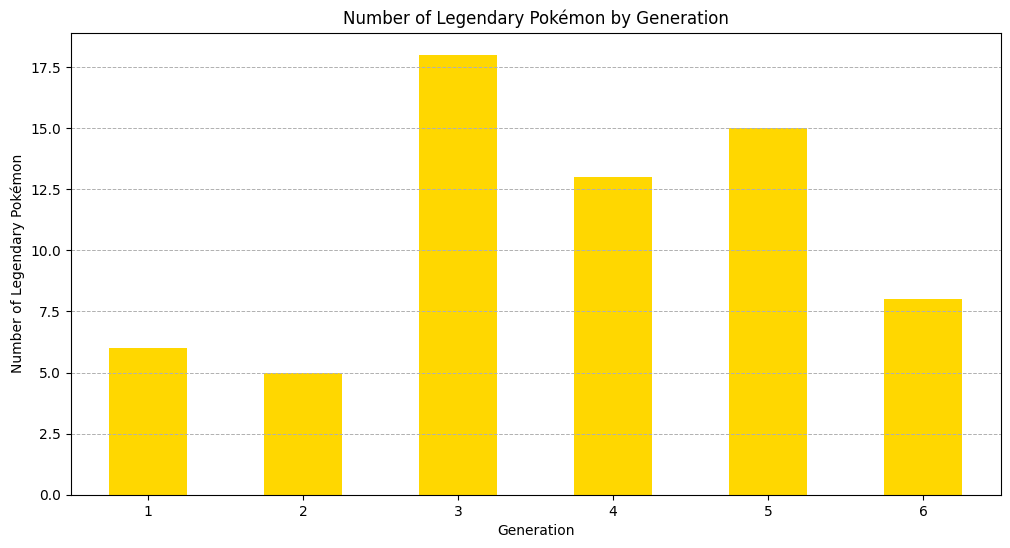

In [ ]:
# Count the number of Legendary Pokémon in each generation
legendary_count_by_generation = pokemon_data[pokemon_data['Legendary'] == True]['Generation'].value_counts().sort_index()

# Plot the number of Legendary Pokémon by generation
plt.figure(figsize=(12, 6))
legendary_count_by_generation.plot(kind='bar', color='gold')
plt.title('Number of Legendary Pokémon by Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Legendary Pokémon')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()



##Generation 3 Dominance:
* Generation 3 features a significant number of Legendary Pokémon, indicating a focus on introducing powerful and unique Pokémon during this generation.

##Implications for Gameplay:
* Players might find Generation 3 particularly appealing for collecting Legendary Pokémon.
* Game designers may consider the impact of this generation's Legendary Pokémon on game balance and player experience.

#Legendary Pokémon Distribution by Combined Type

In [ ]:
# Create a combined type column for both Type 1 and Type 2
pokemon_data['Combined Type'] = pokemon_data.apply(lambda row: f"{row['Type 1']}-{row['Type 2']}" if pd.notnull(row['Type 2']) else f"{row['Type 1']}-nan", axis=1)

# Count the number of Legendary Pokémon by Combined Type
legendary_distribution_by_combined_type = pokemon_data[pokemon_data['Legendary'] == True]['Combined Type'].value_counts().reset_index()
legendary_distribution_by_combined_type.columns = ['Combined Type', 'Count']

# Display the distribution
legendary_distribution_by_combined_type


,Combined Type,Count
0,Psychic-nan,9
1,Dragon-Psychic,4
2,Dragon-Ice,3
3,Electric-Flying,3
4,Water-nan,3
5,Ghost-Dragon,2
6,Flying-nan,2
7,Dragon-Flying,2
8,Ground-Flying,2
9,Normal-nan,2


<ipython-input-38-c4c11c408821>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Combined Type', data=legendary_distribution_by_combined_type, palette='viridis')


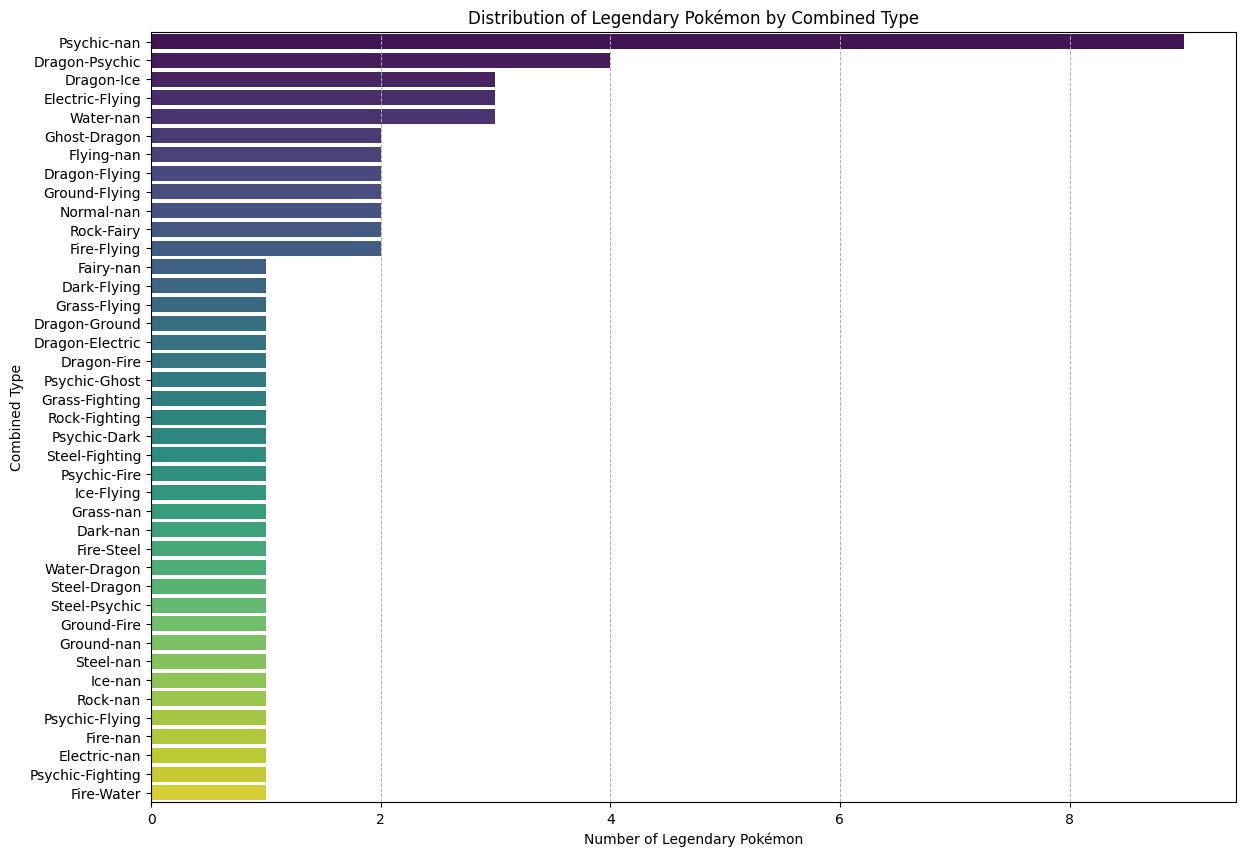

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Legendary Pokémon by combined type
plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='Combined Type', data=legendary_distribution_with_names, palette='viridis')
plt.title('Distribution of Legendary Pokémon by Combined Type')
plt.xlabel('Number of Legendary Pokémon')
plt.ylabel('Combined Type')
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.show()


###Single-Type Dominance:
* Psychic-nan: The most common single type among Legendary Pokémon, with 9 Pokémon having only the Psychic type.

###Common Dual Types:
* Dragon-Psychic: A common dual type, with 4 Legendary Pokémon having this combination.
* Dragon-Ice and Electric-Flying: Each has 3 Legendary Pokémon, making these significant dual types among Legendaries.

###Diverse Types:
* The distribution shows a variety of types, including unique combinations like Fire-Water, Psychic-Ghost, and Dragon-Electric.
* Each type combination contributes to the unique abilities and characteristics of Legendary Pokémon.